<a href="https://colab.research.google.com/github/Scrabby1/ADA-Informes/blob/main/Informe_quickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Descripción del problema

Muchos algoritmos son creados con el propósito de solucionar los problemas de ordenamiento, los cuales han existido desde que se empezaron a desarrollar las tecnologías computacionales. Un algoritmo creado para solucionar este problema es el algoritmo de QuickSort.

El tamaño del problema es el tamaño de la entrada que recibe, en este caso va a ser el tamaño del arreglo.

# 2.QuickSort

A continuación se presentara la implementación de QuickSort

In [106]:
import numpy as np
import random
cont=0
cont2=0
cont3=0

def swap(a,i,j):
  aux=a[i]
  a[i]=a[j]
  a[j]=aux

def partitionMid(a,low,high): #funcion partition que elige de pivote la mediana de un arreglo de 3 elementos
  aux=np.random.choice(a,size=3,replace=True)
  aux.sort()
  mid=len(aux)//2
  global cont2
  for i in range(len(a)):
    if(a[i]==aux[mid]):
      swap(a,i,len(a)-1)
      break
  low=0
  high=len(a)-1
  pivote=a[high]
  piInd=low
  for i in range(low,high):
    if(a[i]<=pivote):
      swap(a,i,piInd)
      piInd+=1
      cont2+=1
    cont2+=1
  swap(a,high,piInd)

  return piInd



def partitionLow(a,low,high): #funcion partition que tiene como pivote el primer elemento del arreglo
  pivote=a[low]
  low2=low+1
  high2=high
  global cont3
  while(True):
    while(low2<=high2 and a[high2]>=pivote):
      high2-=1
      cont3+=1
    while(low2<=high2 and a[low2]<=pivote):
      low2+=1
      cont3+=1
    if(low2<=high2):
      a[low2],a[high2]=a[high2],a[low2]
      cont3+=1
    else:
      break
  a[low],a[high2]=a[high2],a[low]
  return high2

def partitionHigh(a,low,high,verbose): #funcion partition que tiene como pivote el ultimo elemento del arreglo
  if(verbose==True):
    print("Se ingresa a la funcion partition")

  pivote=a[high]
  piInd=low
  global cont
  for i in range(low,high):
    if(a[i]<=pivote):
      swap(a,i,piInd)
      piInd+=1
      cont+=1
    cont+=1
  swap(a,high,piInd)
  if(verbose==True):
    print("Se obtiene de pivote: ",a[piInd])
    print("y el nuevo arreglo es:",a)
    print("-----------------------------------------")
  return piInd


def quickSort(a,low,high,caso,verbose=False): #Funcion principal del algoritmo
  if(low>=high):
    return
  if(caso==1): #dependiendo de la variable caso,se eligira la ubicacion del pivote
    pa=partitionHigh(a,low,high,verbose)
    global cont
    cont+=1
  if(caso==2):
    pa=partitionLow(a,low,high)
    global cont3
    cont3+=1
  if(caso==3):
    pa=partitionMid(a,low,high)
    global cont2
    cont2+=1
  if(verbose==True):
    print("Sub-arreglos segun el pivote:")
    print("Izquierda del pivote",a[low:pa])
    print("Derecha del pivote",a[pa+1:high+1])
    print("Se realiza las llamadas recursivas para los sub arreglos")
    print("*****************************************")

  quickSort(a,low,pa-1,caso,verbose) #llamadas recursivas
  quickSort(a,pa+1,high,caso,verbose)

#Ejemplo

a=[9, -3, 5, 2, 6, 8, -6, 1, 3]
caso=1
print("Arreglo de entrada:",a)
print("-----------------------------------------")
quickSort(a, 0, len(a) - 1,caso)
print("Arreglo de salida:",a)
print("cantidad de comparaciones:")
if(caso==1):
  print(cont)
if(caso==2):
  print(cont3)
if(caso==3):
  print(cont2)

Arreglo de entrada: [9, -3, 5, 2, 6, 8, -6, 1, 3]
-----------------------------------------
Arreglo de salida: [-6, -3, 1, 2, 3, 5, 6, 8, 9]
cantidad de comparaciones:
28


## 2.1.Descripción del algoritmo

El algoritmo quicksort recibe como entrada un arreglo **a**, el primer índice **low** y su ultimo índice **high**, este algoritmo utiliza el paradigma del divide y venceras que consiste en ir dividiendo el arreglo y solucinar los problemas cuando el arreglo es pequeño, en este caso el problema es ordenar el arreglo.

Para poder hacer el paradigma se utiliza de manera recursiva, este arreglo se basa en la eleccion de un pivote y a base de ese pivote ir ordenando el arreglo, esto lo consigue con dos funciones:la principal es quickSort que se encarga de dividir el arreglo y la función partition que se encarga de seleccionar el pivote y reorganizar el arreglo

La función partition para realizar su función recibe el índice inicial **low** y final **high** del arreglo **a**, cuando se entra en la función esta escoge un pivote, la elección para las explicaciones que haremos en este informe será el último elemento **a[high]**, una vez escogido el pivote la idea será organizar el arreglo recibido a base de este pivote, se debe organizar dejando los elementos a la izquierda del pivote que sean menores al pivote y a la derecha se tendrán los elementos mayores que el pivote, esta acción se lleva a cabo realizando intercambios de elementos usando la función swap, una vez organizado se retornara el índice del pivote.

La función quickSort retorna el mismo arreglo si este es muy pequeño, si no ocurre ese caso se llama a la función partition para obtener el pivote y una vez realizado esto se llama la función quicksort de manera recursiva para reorganizar el arreglo desde la parte izquierda del pivote y la derecha del pivote.

Al final como salida vamos a tener el arreglo **a** con todos sus elementos ordenados de menor a mayor.

###2.2.Ejemplo de la función partition

Consideremos el siguiente arreglo: **a=[2,8,7,1,3,5,6,4]**

Nuestra variables **low** y **high** seran los índices 0 y 7 respectivamente

Nuestro **pivote** sera 4

La variable **piInd** sera el índice **low**

**i=0**, **a[i]=2** y **pivote = 4**

Como la posición actual es menor al pivote se realiza un intercambio entre la posición que contiene **piInd** y **i**, en este caso no ocurre un cambio debido a que son la misma posición, pero piInd se incrementa **piInd=1**

**a=[2,8,7,1,3,5,6,4]**

**i=1**, **a[i]=8**

La posición actual no es menor por lo que no ocurre un intercambio

**a=[2,8,7,1,3,5,6,4]**

**i=2**, **a[i]=7**

La posición actual no es menor por lo que no ocurre un intercambio

**a=[2,8,7,1,3,5,6,4]**

**i=3**, **a[i]=1**

La posición actual es menor al pivote por lo que se realiza un intercambio entre la posición que tiene piInd y i, en este caso serán **a[piInd]=8** y **a[i]=1** y se incrementa piInd, **piInd=2**

**a=[2,1,7,8,3,5,6,4]**

**i=4**, **a[i]=3**

La posición actual es menor que el pivote, por lo que se debe hacer un intercambio entre la posición que tiene piInd y i, en este caso serán **a[piInd]=7** y **a[i]=3**. Se incrementa piInd, **piInd=3**

**a=[2,1,3,8,7,5,6,4]**

**i=5**, **a[i]=5**

La posición actual no es menor por lo que no ocurre un intercambio


**a=[2,1,3,8,7,5,6,4]**

**i=6**, **a[i]=6**

La posición actual no es menor por lo que no ocurre un intercambio

Al final del ciclo iterativo ocurre un intercambio entre piInd y el pivote, como arreglo vamos a tener

**a=[2,1,3,4,7,5,6,8]**

###2.3.Ejemplo QuickSort

Tomemos el siguiente arreglo: **a=[9, -3, 5, 2, 6, 8, -6, 1, 3]**

Se obtiene el primer pivote el cual sera **3** gracias a la funcion partition, luego ordenando el arreglo vamos a tener

**a=[-3, 2, -6, 1, 3, 8, 5, 9, 6]**

Se realiza quicksort para el lado izquierdo del pivote y el derecho, especificamente para **a[low:pa]=[-3,2,-6,1]** y **a[pa+1:high+1]=[8,5,9,6]**

primero veremos el lado izquierdo:
como pivote vamos a tener **1** y ordenado por el pivote quedara **[-3,-6,1,2]**

Como el lado derecho del pivote solo tiene un elemento (siendo el 2) miraremos el lado izquierdo de este, haciendo la llamada del quicksort quedara **[-6,-3]** y con esto el sub-arreglo izquierdo por el primer pivote sera **[-6,-3,1,2]**

Volvamos al primer sub-arreglo del pivote derecho **[8,5,9,6]**, llamando quicksort tendremos como pivote al **6** y ordenado a base de este quedara **[5,6,9,8]**

El lado izquierdo del pivote ya se encuentra ordenado (solo un elemento 5), veamos el derecho **[9,8]**

LLamando quicksort y realizando el orden con el pivote se tendra que **[8,9]**

Teniendo los lados del pivote ordenados vamos a tener el arreglo completamente ordenado **a[-6-3,1,2,3,5,6,8,9]**

###2.4.Ejecucion del algoritmo paso a paso (verbose=True)

In [3]:
a=random.sample(range(-100,100),6)
print("Arreglo de entrada:",a)
print("-----------------------------------------")
quickSort(a, 0, len(a) - 1,1,True)
print("Arreglo de salida:",a)
print("-----------------------------------------")

Arreglo de entrada: [54, 87, -57, 30, 51, -43]
-----------------------------------------
Se ingresa a la funcion partition
Se obtiene de pivote:  -43
y el nuevo arreglo es: [-57, -43, 54, 30, 51, 87]
-----------------------------------------
Sub-arreglos segun el pivote:
Izquierda del pivote [-57]
Derecha del pivote [54, 30, 51, 87]
Se realiza las llamadas recursivas para los sub arreglos
*****************************************
Se ingresa a la funcion partition
Se obtiene de pivote:  87
y el nuevo arreglo es: [-57, -43, 54, 30, 51, 87]
-----------------------------------------
Sub-arreglos segun el pivote:
Izquierda del pivote [54, 30, 51]
Derecha del pivote []
Se realiza las llamadas recursivas para los sub arreglos
*****************************************
Se ingresa a la funcion partition
Se obtiene de pivote:  51
y el nuevo arreglo es: [-57, -43, 30, 51, 54, 87]
-----------------------------------------
Sub-arreglos segun el pivote:
Izquierda del pivote [30]
Derecha del pivote [5

# 3.Correctitud

## 3.1.Funcion Partition

**Teorema (correctitud)**

La función partition realiza correctamente la obtención del pivote **piInd** y organiza los datos a los lados de este de tal forma que los elementos **a[low,piInd-1]** sean menores a **piInd** y los elementos en **a[piInd,high]** sean mayores a **piInd**

**Prueba del teorema**

Para probar el teorema se utilizara la propiedad del bucle invariante

La propiedad dice que:
Al comienzo de cada iteración se cumple que para cualquier índice k:

Si low<=k<=i entonces a[k]<=pivote, siendo low la posición inicial del arreglo recibido y i el último elemento menor que el pivote

Si i<k<piInd, entonces a[k]>pivote siendo piInd el último elemento mayor registrado

**Inicialización:** antes de iterar i=low-1 y piInd=low

Por lo tanto, k va a ser igual que low y i, pero también va a ser igual a piInd por lo que se cumplen las dos condiciones establecidas


**Mantención:** Durante la i-ésima iteración pueden ocurrir dos casos:

caso a): a[i]>pivote, solo se realiza un cambio entre a[piInd] y a[high] y se incrementa i

caso b): a[i]<=pivote, se realiza el cambio entre hecho en el caso a y además se realizara el cambio entre a[i] y a[piInd] y se incrementara piInd y i.

Al finalizar la iteración se habrá hecho los cambios apropiados para que se siga cumpliendo la propiedad.



La propiedad se mantiene durante la inicialización y la mantención, por lo que la función partition es correcta.

## 3.2.Función quickSort

**Teorema (Correctitud)**

El algoritmo quickSort recibe un arreglo no ordenado y realiza correctamente el ordenamiento de este.

**Prueba del teorema**

Se utilizará inducción matemática para probar el teorema.

Durante el caso base **P(1)** retorna solo el arreglo ya que es muy pequeño **n=1**

Durante el caso inductivo se debe probar que **P(m)** es cierto para **m < n**

QuickSort realiza particiones tales que **m=n/2** para los dos sub-arreglos, esto cumple con **m < n** por lo tanto se asume que quickSort entrega correctamente el arreglo ordenado

Cabe destacar que la función Partition es llamada antes de la llamada recursiva, esta función ya fue probada que funciona correctamente, por lo que la función quickSort funciona correctamente

# 4.Tiempo de ejecución

Primero analizaremos el tiempo de ejecución durante el peor caso, este peor caso vendrá cuando la elección del pivote sea el mayor elemento del arreglo o el menor, no importa donde este colocado, esto nos dejará con solo un lado con los datos y el resto completamente vacío. Esto se podría decir que quedaran dos sub-arreglos uno con **n-1** elementos y otro con **1** elemento vacío.

**Explicación**

Sea **T(n)** el tiempo total del algoritmo en su peor caso y **n** el tamaño del arreglo

**T(n)=T(n-1)+constante*n**
Mientras más dividimos el arreglo en dos partes vamos a tener una de un pequeño elemento y otra de tamaño **n-1**.

Si seguimos haciendo divisiones vamos a tener

**T(n) = T(n-2) + constante * (n-1) + constante * n =  T(n-2) + 2 * constante * n - constante**

**T(n) = T(n-3) + 3 * constante * n - 2 * constante - constante**

**T(n) = T(n-k) + k * constante * n - (k-1) * constante ..... - 2 * constante - constante**


Si llegamos hasta que el valor n-ésimo vamos a tener que

**T(n) = T(0) + constante * n * n - constante * [n * (n-1)/2]**

Si removemos los términos constantes vamos a tener que:
**T(n)=n * n - [n * (n-1)/2]**

Nuestro valor que mayor crece es **n^2**, por lo tanto el tiempo de ejecución en el peor caso es **O(n^2)**.

**Mejor caso**

El mejor caso ocurre cuando el pivote elegido es el elemento del medio del arreglo

La siguiente ecuación recurrente es utilizada para el mejor caso:

**T(n)=2T(n/2)+O(n)**

siendo 2 las llamadas recursivas, 2 las divisiones que debe hacer y **O(n)** proviene de la función partition

Utilizando el teorema maestro vamos a caer en el segundo caso, por lo que la complejidad para el mejor caso sería: **O(nlogn)**.

#5.Experimentos

A continuación se presentaran los experimentos realizados

**Comparación entre el peor caso y el mejor caso**

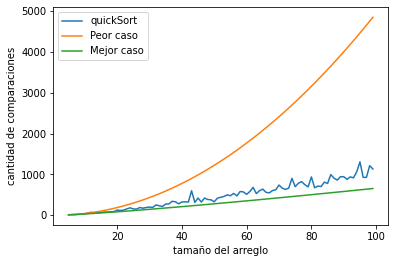

In [64]:
import math
import matplotlib.pyplot as plt

x=[n for n in range(5,100)]
y1=[(((n*n)-n)/2) for n in range(5,100)]#peor caso
y2=[n*math.log2(n) for n in range(5,100)]#mejor caso
y=[];

for n in range(5,100):
  a = random.sample(range(1,100),n)
  cont=0
  quickSort(a, 0, len(a) - 1,1)
  y.append(cont)
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["quickSort","Peor caso","Mejor caso"])

plt.xlabel('tamaño del arreglo')
plt.ylabel('cantidad de comparaciones')
plt.show()

**Análisis de los resultados**

Se puede apreciar que, durante el peor caso, el quicksort realiza una enorme cantidad de comparaciones, esto se debe a que el arreglo ya se encuentra ordenado, también se puede destacar lo cerca que están el mejor y el caso normal, esto muestra que el mejor caso no es muy distinto al caso promedio, pero se puede apreciar que no tiene distintos picos en su línea.

**Comparación entre el QuickSort y el MergeSort**

In [23]:
cont2=0 

def Merge(arr,sub1,sub2):
  i=j=k=0
  global cont2
  while(i < len(sub1) and j < len(sub2)): 
    if(sub1[i]<sub2[j]):
      arr[k]=sub1[i]
      i += 1
      cont2+=1
    else:
      arr[k]=sub2[j]
      j += 1
      cont2+=1
    k += 1

  while(i<len(sub1)): 
    arr[k]=sub1[i]
    i+=1
    k+=1
    cont2+=1

  while(j < len(sub2)):
    arr[k]=sub2[j]
    j+=1
    k+=1
    cont2+=1
  
  


def MergeSort(a,verbose=False):
  if(len(a)>1):
    medio=len(a)//2 
    subDe=a[:medio]
    subIz=a[medio:]
    MergeSort(subDe,verbose) 
    MergeSort(subIz,verbose)
    Merge(a,subIz,subDe)

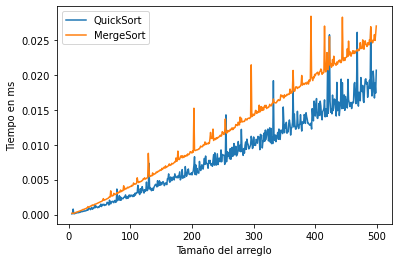

In [70]:
import datetime
from timeit import repeat

x=[];
y=[];
z=[];
for n in range(5,500):
  a = random.sample(range(1,1000),n)
  b = random.sample(range(1,1000),n)
  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a},{0}, {len(a) - 1},{1})", repeat=1, number=10)
  k = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({b})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  z.append(k)
plt.plot(x,y)
plt.plot(x,z)

plt.legend(["QuickSort","MergeSort"])
plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

**Análisis del resultado**

Se puede destacar que el quicksort esta por debajo del mergeSort, esto ocurre ya que el algoritmo es mas rapido realizando su funcion, cabe destacar que hay varios picos que pasan entre el mergeSort y lo superan dejando claro que el mergeSort es eficiente para algunos casos, esto se destaca debido a que es un mal caso para el quickSort pero no para el MergeSort.

**Rendimiento segun la elección del pivote**

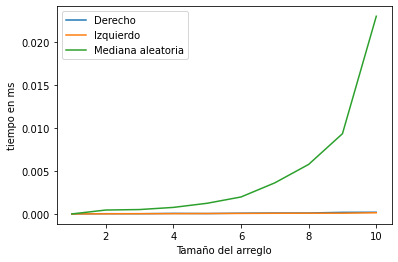

In [90]:
import datetime
from timeit import repeat

x=[];
x2=[];
x3=[];
y=[];
z=[];
w=[];
for n in range(1,11):
  a = random.sample(range(1,1000),n)
  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, {0}, {len(a) - 1},{1})", repeat=1, number=10) #pivote en el extremo derecho 
  k = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, {0}, {len(a) - 1},{2})", repeat=1, number=10) #pivote en el extremo izquierdo
  j = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, {0}, {len(a) - 1},{3})", repeat=1, number=10) #pivote elegido por la mediana de un sub-arreglo de tamaño tres
  x.append(n)
  y.append(t)

  x2.append(n)
  z.append(k)

  x3.append(n)
  w.append(j)

plt.plot(x,y)
plt.plot(x2,z)
plt.plot(x3,w)

plt.legend(["Derecho","Izquierdo","Mediana aleatoria"])
plt.xlabel('Tamaño del arreglo')
plt.ylabel('tiempo en ms')
plt.show()

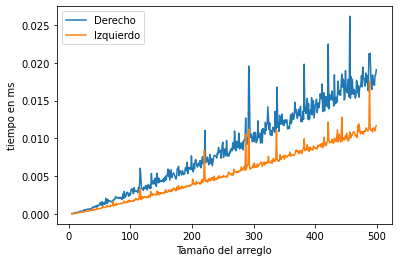

In [91]:
import datetime
from timeit import repeat

x=[];
x2=[];

y=[];
z=[];

for n in range(5,500):
  a = random.sample(range(1,1000),n)
  t = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, {0}, {len(a) - 1},{1})", repeat=1, number=10) #pivote en el extremo derecho 
  k = repeat(setup="from __main__ import quickSort", stmt=f"quickSort({a}, {0}, {len(a) - 1},{2})", repeat=1, number=10) #pivote en el extremo izquierdo
  x.append(n)
  y.append(t)

  x2.append(n)
  z.append(k)


plt.plot(x,y)
plt.plot(x2,z)
plt.legend(["Derecho","Izquierdo"])
plt.xlabel('Tamaño del arreglo')
plt.ylabel('tiempo en ms')
plt.show()

**Análisis de resultados**

Se puede notar en el primer grafico que tanto el pivote en el extremo derecho y izquierdo se mantienen igual, pero la mediana de un arreglo tres crece enormemente, esto se debe a que toma mucho más tiempo la elección de la media, esta requiere varios procesos para elegir el pivote correcto. Si miramos el segundo grafico nos podemos dar cuenta que hay una diferencia entre la elección del pivote en el extremo derecho e izquierdo, se puede decir que esta diferencia ocurre porque el derecho tiene que realizar una mayor cantidad de comparaciones debido al orden inverso que habitualmente se usa. Por lo tanto, se puede concluir que la mejor elección del pivote es el extremo derecho